# Alzheimer's Analysis and Prediction

In [30]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [31]:
df=pd.read_csv(r"C:\Users\Lenovo\Downloads\clean_alzheimers_dataset_400_rows.csv")
df

,Patient_ID,Age,Gender,Education_Years,Socioeconomic_Status,MMSE_Score,CDR_Score,Brain_Volume,Normalized_Brain_Volume,Diagnosis
0,1,66,Male,10,3,12,0.0,1006,0.767,ModerateDemented
1,2,79,Female,17,4,17,0.5,1586,0.630,MildDemented
2,3,88,Male,12,3,24,1.0,1103,0.720,MildDemented
3,4,74,Female,12,2,14,1.0,1064,0.727,ModerateDemented
4,5,70,Male,10,2,12,2.0,1204,0.658,ModerateDemented
...,...,...,...,...,...,...,...,...,...,...
395,396,61,Female,15,2,12,2.0,1137,0.699,ModerateDemented
396,397,81,Female,13,3,29,0.5,1280,0.623,VeryMildDemented
397,398,62,Male,9,1,21,2.0,1335,0.710,ModerateDemented
398,399,75,Female,11,4,16,2.0,1382,0.649,ModerateDemented


In [32]:
df.head

<bound method NDFrame.head of      Patient_ID  Age  Gender  Education_Years  Socioeconomic_Status  \
0             1   66    Male               10                     3   
1             2   79  Female               17                     4   
2             3   88    Male               12                     3   
3             4   74  Female               12                     2   
4             5   70    Male               10                     2   
..          ...  ...     ...              ...                   ...   
395         396   61  Female               15                     2   
396         397   81  Female               13                     3   
397         398   62    Male                9                     1   
398         399   75  Female               11                     4   
399         400   88  Female               19                     1   

     MMSE_Score  CDR_Score  Brain_Volume  Normalized_Brain_Volume  \
0            12        0.0          1006        

In [33]:
df.info

<bound method DataFrame.info of      Patient_ID  Age  Gender  Education_Years  Socioeconomic_Status  \
0             1   66    Male               10                     3   
1             2   79  Female               17                     4   
2             3   88    Male               12                     3   
3             4   74  Female               12                     2   
4             5   70    Male               10                     2   
..          ...  ...     ...              ...                   ...   
395         396   61  Female               15                     2   
396         397   81  Female               13                     3   
397         398   62    Male                9                     1   
398         399   75  Female               11                     4   
399         400   88  Female               19                     1   

     MMSE_Score  CDR_Score  Brain_Volume  Normalized_Brain_Volume  \
0            12        0.0          1006      

In [34]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               400 non-null    int64  
 1   Age                      400 non-null    int64  
 2   Gender                   400 non-null    object 
 3   Education_Years          400 non-null    int64  
 4   Socioeconomic_Status     400 non-null    int64  
 5   MMSE_Score               400 non-null    int64  
 6   CDR_Score                400 non-null    float64
 7   Brain_Volume             400 non-null    int64  
 8   Normalized_Brain_Volume  400 non-null    float64
 9   Diagnosis                400 non-null    object 
dtypes: float64(2), int64(6), object(2)
memory usage: 31.4+ KB


,Patient_ID,Age,Education_Years,Socioeconomic_Status,MMSE_Score,CDR_Score,Brain_Volume,Normalized_Brain_Volume
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000
mean,200.500000,74.895000,13.452500,2.455000,19.335000,0.89250,1256.090000,0.721037
std,115.614301,9.231306,3.455807,1.102731,5.625112,0.74571,203.191952,0.072338
min,1.000000,60.000000,8.000000,1.000000,10.000000,0.00000,900.000000,0.600000
25%,100.750000,66.750000,10.000000,1.000000,14.000000,0.50000,1069.750000,0.656000
50%,200.500000,75.000000,13.000000,2.000000,19.000000,0.50000,1248.000000,0.721500
75%,300.250000,83.000000,17.000000,3.000000,24.000000,2.00000,1436.250000,0.786000
max,400.000000,89.000000,19.000000,4.000000,29.000000,2.00000,1599.000000,0.848000


In [35]:
df.isnull().sum()

Patient_ID                 0
Age                        0
Gender                     0
Education_Years            0
Socioeconomic_Status       0
MMSE_Score                 0
CDR_Score                  0
Brain_Volume               0
Normalized_Brain_Volume    0
Diagnosis                  0
dtype: int64

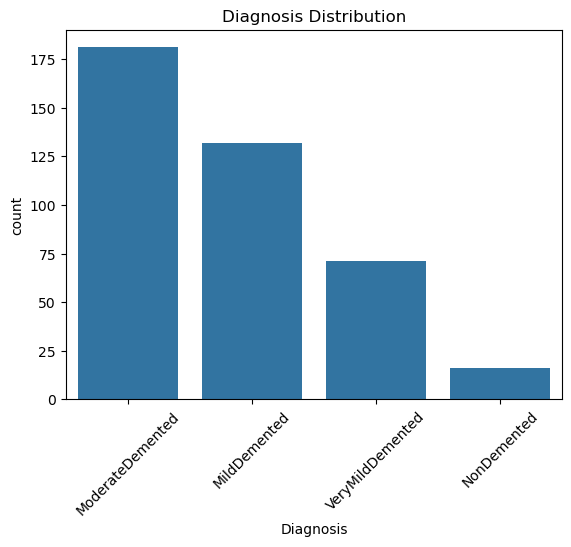

In [36]:
sns.countplot(x='Diagnosis', data=df)
plt.xticks(rotation=45)
plt.title("Diagnosis Distribution")
plt.show()


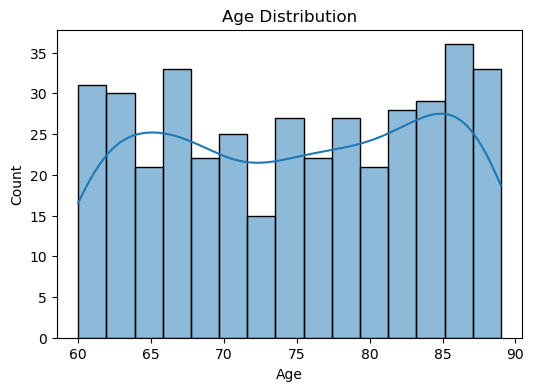

In [37]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=15, kde=True)
plt.title("Age Distribution")
plt.show()

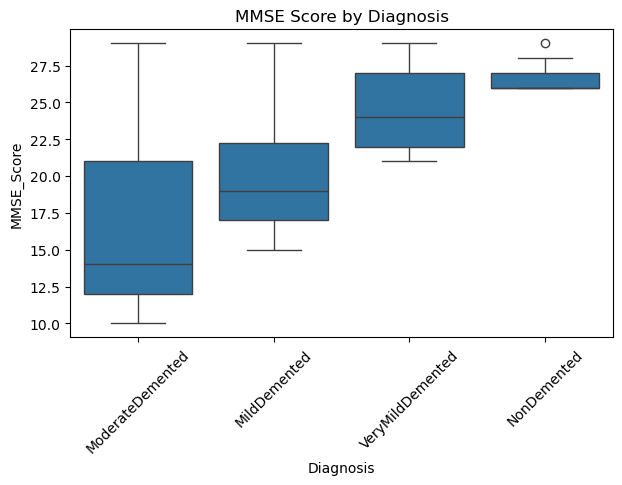

In [38]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Diagnosis', y='MMSE_Score', data=df)
plt.xticks(rotation=45)
plt.title("MMSE Score by Diagnosis")
plt.show()

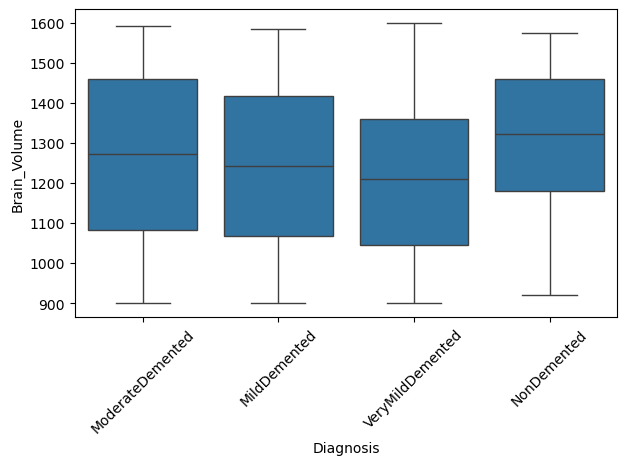

In [39]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Diagnosis', y='Brain_Volume', data=df)
plt.xticks(rotation=45)
plt.show()

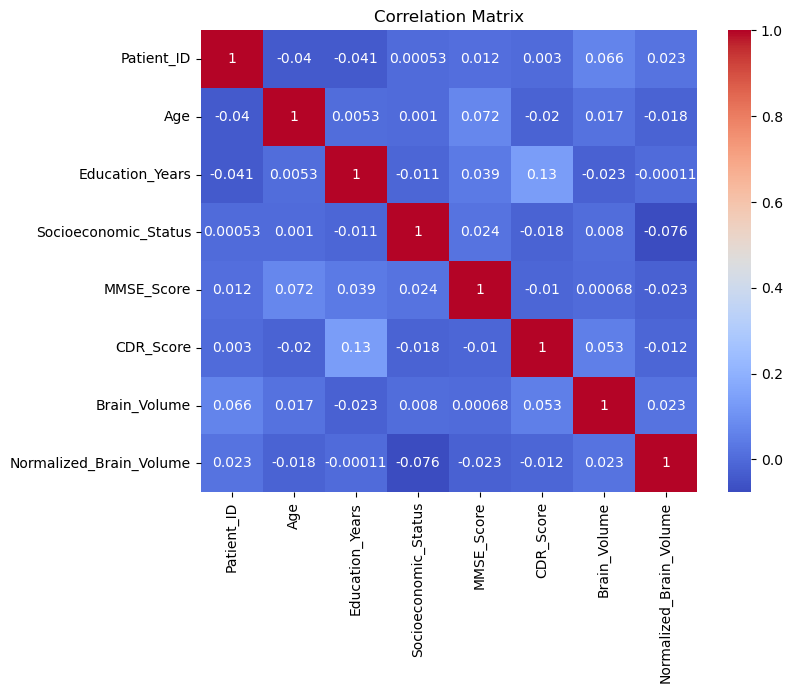

In [40]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [43]:
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])
df['Diagnosis'] = le.fit_transform(df['Diagnosis'])

In [44]:
X = df.drop(['Diagnosis', 'Patient_ID'], axis=1)
y = df['Diagnosis']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [46]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [48]:
y_pred = model.predict(X_test)


In [49]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9875


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        42
           2       1.00      0.67      0.80         3
           3       0.92      1.00      0.96        11

    accuracy                           0.99        80
   macro avg       0.98      0.92      0.94        80
weighted avg       0.99      0.99      0.99        80



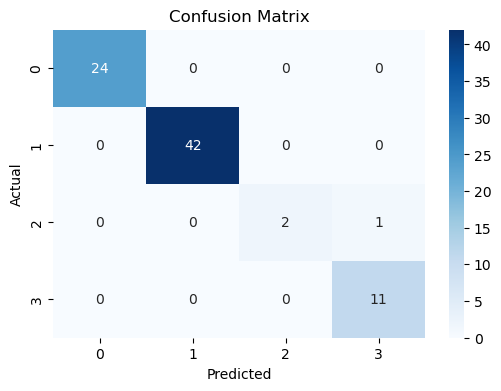

In [51]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

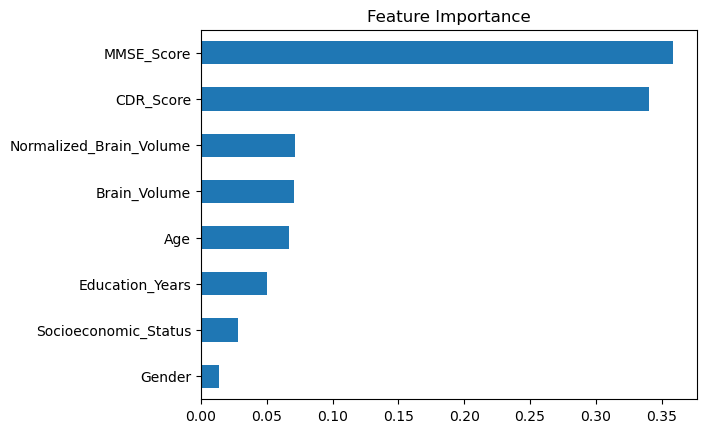

In [52]:
importances = model.feature_importances_

feature_importance = pd.Series(importances, index=X.columns)
feature_importance.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()

In [53]:
new_patient = [[75, 1, 14, 2, 20, 1, 1200, 0.70]]

new_patient_scaled = scaler.transform(new_patient)

prediction = model.predict(new_patient_scaled)

print("Predicted Diagnosis:", prediction)

Predicted Diagnosis: [0]
